# imports

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_modules():
    sys.path.append("../../../")
    %run ../../../ds/unity/npz/gen.py
    %run ../../../ac/visualizer/plotter.py
    %run ../../../al/optics/transformation/warps.py
    
load_modules()

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

Using TensorFlow backend.


# resources

In [3]:
npz_path = "/home/chy/archive-data/processed/unity-class-shuffled-npz"

# check gen

In [4]:
ugen = UnityEyePoseGenerator(npz_path, batch_size=50)

*** meta verify complete [Unknown] ***


/home/chy/devs/chyenv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/chy/devs/chyenv/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


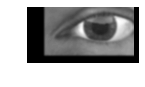

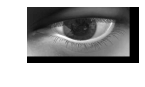

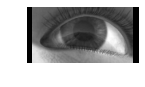

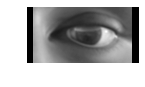

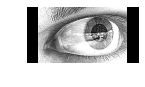

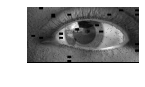

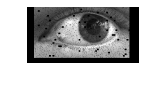

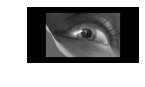

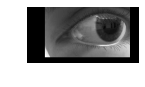

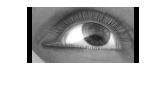

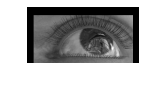

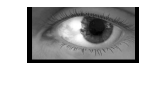

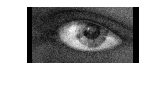

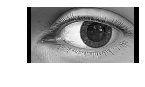

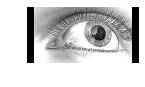

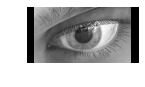

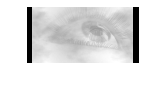

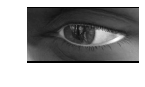

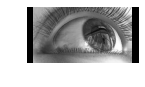

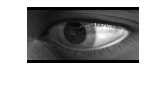

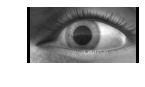

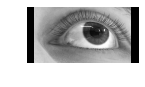

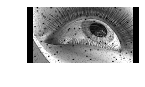

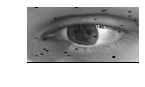

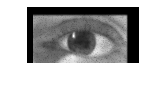

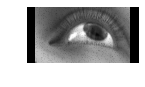

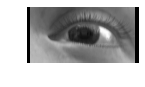

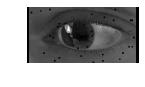

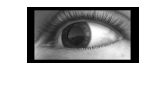

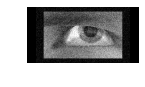

In [5]:
ins, preds = ugen[0]

for i in range(30):
    img = ins[0][i]
    img = np.squeeze(img)
    show_image(img, fig_size=(2,2))

# filter-visualize

In [6]:
ugen = UnityEyePoseGenerator(npz_path, batch_size=1)

*** meta verify complete [Unknown] ***


In [ ]:
# img = cv2.bitwise_not(img)
# show_image(img, fig_size=(2,2))

# lapla_img = cv2.Laplacian(img, cv2.CV_64F)
# show_image(lapla_img, fig_size=(2,2))

# sob_img_x = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=-1)
# show_image(sob_img_x, fig_size=(2,2))

# sob_img_y = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=-1)
# show_image(sob_img_y, fig_size=(2,2))

# sob_img_xy = cv2.Sobel(sob_img_x, cv2.CV_64F, 0,1, ksize=-1)
# show_image(sob_img_xy, fig_size=(2,2))

# canny_img = cv2.Canny(img, 30, 70)
# show_image(canny_img, fig_size=(2,2))

# perspective normalization (큰 효과 없음)

In [7]:
ugen = UnityEyePoseGenerator(npz_path, batch_size=1, is_item_mode=True)

*** meta verify complete [Unknown] ***


In [ ]:
for i in range(70, 100):
    item = ugen[i][0]
    frame = item.get_cropped_eye_img()
    yaw, pitch, _ = item.head_pose
    
    ax = show_image(item.get_decoded_frame(), fig_size=(5, 5))
    
    ax = show_image(frame, fig_size=(3, 3))
    draw_point(ax, frame.shape[1]//2, frame.shape[0]//2)
    
    rot_img = Warps.rotate(frame, yaw-360, pitch-180, 0)
    ax = show_image(rot_img, fig_size=(3, 3))
    draw_point(ax, frame.shape[1]//2, frame.shape[0]//2)

# vis iris

In [4]:
ugen = UnityEyePoseGenerator(npz_path, batch_size=1, is_item_mode=True)

*** meta verify complete [Unknown] ***


In [5]:
def vis_item(item: UnityItem):
    frame = item.get_decoded_frame()
    ax = show_image(bgr_to_rgb(frame), fig_size=(30, 30))
    
    for p in item.iris:
        draw_point(ax, p[0], item.image_shape[0] - p[1], color='red')

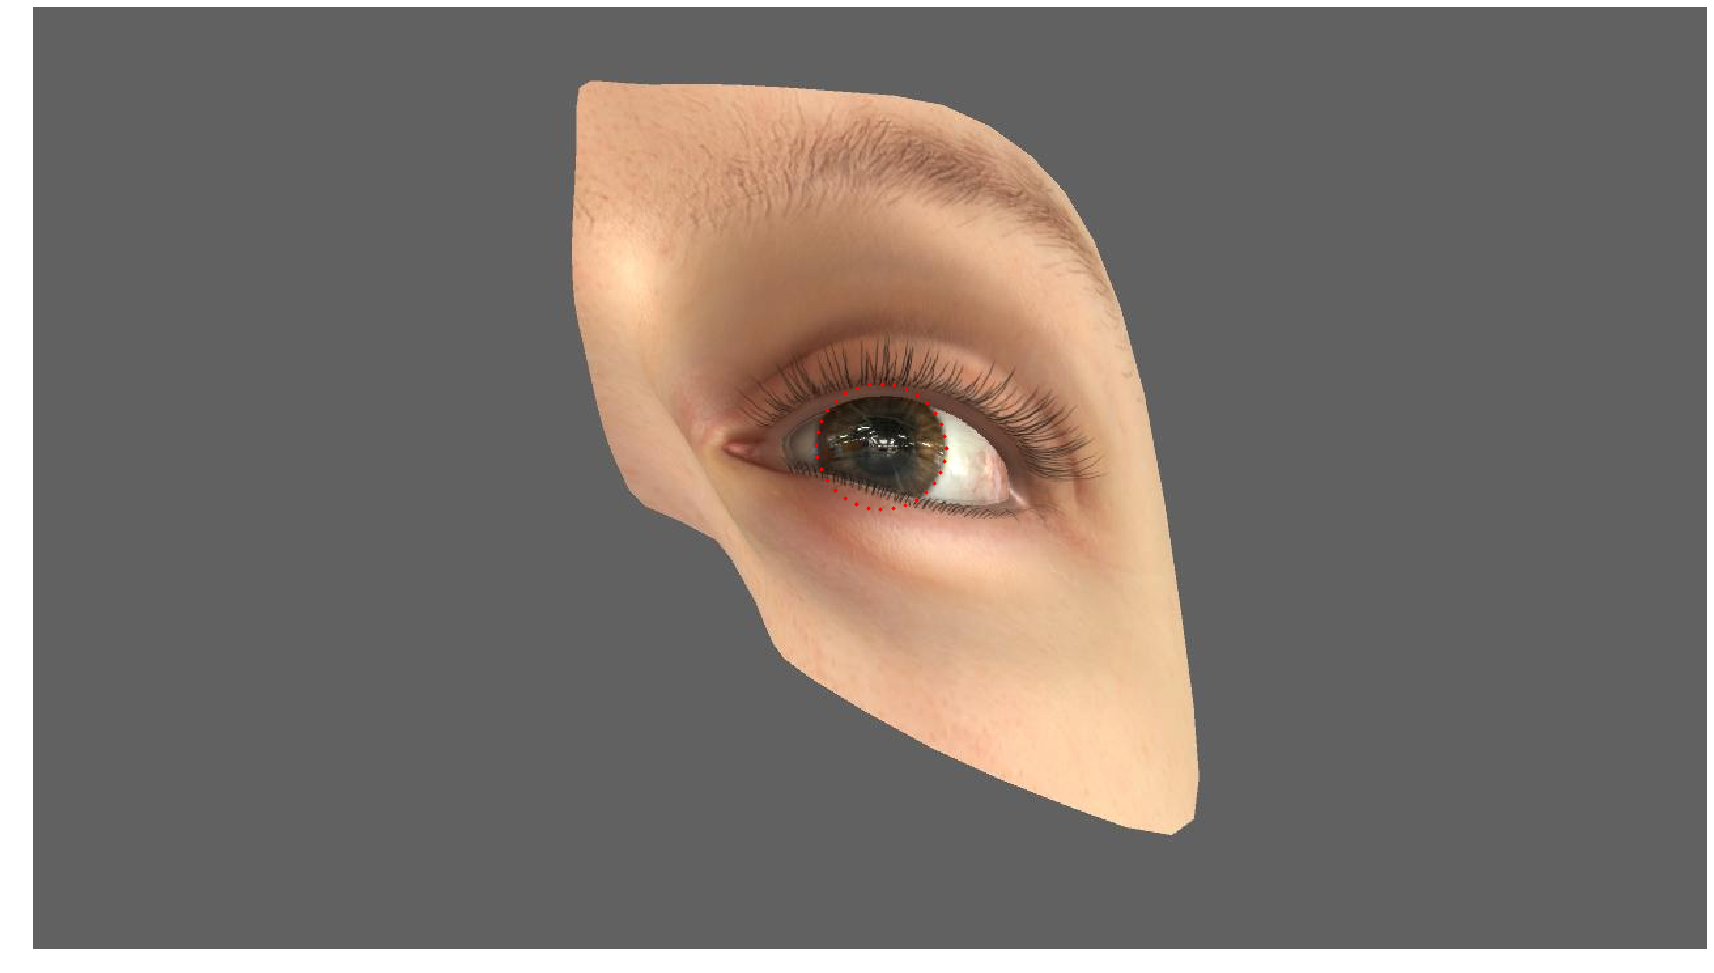

In [17]:
vis_item(ugen[38][0])